In [1]:
from droplet_approximation.data import *
from droplet_approximation.models import *

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
iterations = 1

In [3]:
df = read_NTLP_data("../data/data_file_NTLP_uncoupled_400M.data")

In [6]:
temperature_range = [df["input temperature"].quantile(0.00005),df["input temperature"].quantile(0.99995)]
radius_range = [1.99e-7, df["input radius"].quantile(0.99995)]

In [ ]:
df[(df["output temperature"] > temperature_range[0]) & 
            (df["output temperature"] < temperature_range[1]) & 
            (df["input temperature"] > temperature_range[0]) & 
            (df["input temperature"] < temperature_range[1]) &
            (df["output radius"] > radius_range[0]) & 
            (df["output radius"] < radius_range[1]) & 
            (df["input radius"] > radius_range[0]) & 
            (df["input radius"] < radius_range[1]) & 
            (df["air density"] == 1.0) & 
            (df["relative humidity"] < 5.0)][["input radius", "input temperature", "salinity", "air temperature", "relative humidity", "air density", "integration time", "output radius", "output temperature"]].min()

In [ ]:
df = pd.read_parquet("###")

In [4]:
error_data = np.fromfile("../data/error_score_NTLP_data.data", dtype=(np.float64, 2))

In [5]:
print(error_data)

[[4.91849201e-05 2.89476946e+02]
 [1.16429338e-06 2.89553378e+02]
 [1.19282906e-06 2.89556613e+02]
 ...
 [2.51188643e-06 2.92000000e+02]
 [2.51188643e-06 2.92000000e+02]
 [2.51188643e-06 2.92000000e+02]]


In [6]:
df["MLP i3 output radius"] = error_data[:,0]
df["MLP log10 i3 output radius"] = np.log10(error_data[:, 0])
df["MLP i3 output temperature"] = error_data[:, 1]

# Clean data
with pd.option_context('mode.use_inf_as_na', True):
   df = df.dropna()


/tmp/ipykernel_478570/1115048018.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [7]:

df["i3 output radius"] = df["input radius"].shift(-iterations)
df["log10 i3 output radius"] = np.log10(df["i3 output radius"])
df["i3 output temperature"] = df["input temperature"].shift(-iterations)

In [8]:
df["error log10 i3 output radius"] = df["MLP log10 i3 output radius"] - df["log10 i3 output radius"]
df["error i3 output radius"] = 100*(df["MLP i3 output radius"] - df["i3 output radius"])/df["i3 output radius"]
df["error i3 output temperature"] = 100*(df["MLP i3 output temperature"] - df["i3 output temperature"])/df["i3 output temperature"]

In [9]:
print(df["error log10 i3 output radius"])

557          2.160761
569          0.445034
581          0.398755
593          0.365149
605          0.338064
               ...   
368102565    0.770277
368103671    0.769846
368104776    0.769336
368105881    0.768772
368106991         NaN
Name: error log10 i3 output radius, Length: 36689211, dtype: float64


In [10]:
df.tail(20)

,particle id,be flag,time,input radius,input temperature,salinity,air temperature,relative humidity,air density,processor,...,output temperature,MLP i3 output radius,MLP log10 i3 output radius,MLP i3 output temperature,i3 output radius,log10 i3 output radius,i3 output temperature,error log10 i3 output radius,error i3 output radius,error i3 output temperature
368085658,870063,1,861.777771,4.232631e-07,289.624786,2.211681e-18,289.624786,0.998396,1.0,63,...,289.624725,0.000003,-5.6,292.0,4.231570e-07,-6.373498,289.624725,0.773498,493.606311,0.820122
368086803,870063,1,861.897644,4.231570e-07,289.624725,2.211681e-18,289.624756,0.998391,1.0,63,...,289.626068,0.000003,-5.6,292.0,4.232328e-07,-6.373421,289.626068,0.773421,493.499957,0.819654
368087946,870063,1,862.017151,4.232328e-07,289.626068,2.211681e-18,289.626038,0.998399,1.0,63,...,289.628296,0.000003,-5.6,292.0,4.235557e-07,-6.373089,289.628296,0.773089,493.047540,0.818879
368089086,870063,1,862.136292,4.235557e-07,289.628296,2.211681e-18,289.628174,0.998414,1.0,63,...,289.630219,0.000003,-5.6,292.0,4.239769e-07,-6.372658,289.630219,0.772658,492.458363,0.818209
368090219,870063,1,862.255127,4.239769e-07,289.630219,2.211681e-18,289.630035,0.998428,1.0,63,...,289.631836,0.000003,-5.6,292.0,4.244306e-07,-6.372193,289.631836,0.772193,491.825014,0.817646
368091353,870063,1,862.373657,4.244306e-07,289.631836,2.211681e-18,289.631653,0.998439,1.0,63,...,289.633148,0.000003,-5.6,292.0,4.248753e-07,-6.371738,289.633148,0.771738,491.205554,0.817190
368092489,870063,1,862.491699,4.248753e-07,289.633148,2.211681e-18,289.632965,0.998449,1.0,63,...,289.634155,0.000003,-5.6,292.0,4.252650e-07,-6.371340,289.634155,0.771340,490.663766,0.816839
368093620,870063,1,862.609192,4.252650e-07,289.634155,2.211681e-18,289.634003,0.998457,1.0,63,...,289.634888,0.000003,-5.6,292.0,4.255904e-07,-6.371008,289.634888,0.771008,490.212153,0.816584
368094749,870063,1,862.726196,4.255904e-07,289.634888,2.211681e-18,289.634766,0.998462,1.0,63,...,289.635345,0.000003,-5.6,292.0,4.258283e-07,-6.370766,289.635345,0.770766,489.882430,0.816425
368095873,870063,1,862.842712,4.258283e-07,289.635345,2.211681e-18,289.635254,0.998464,1.0,63,...,289.635559,0.000003,-5.6,292.0,4.259667e-07,-6.370625,289.635559,0.770625,489.690753,0.816350


In [11]:
with pd.option_context('mode.use_inf_as_na', True):
   df = df.dropna()

/tmp/ipykernel_478570/2455454544.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [12]:

df = df[(df["relative humidity"] < 1.5) & (df["error log10 i3 output radius"] < 4.0)]

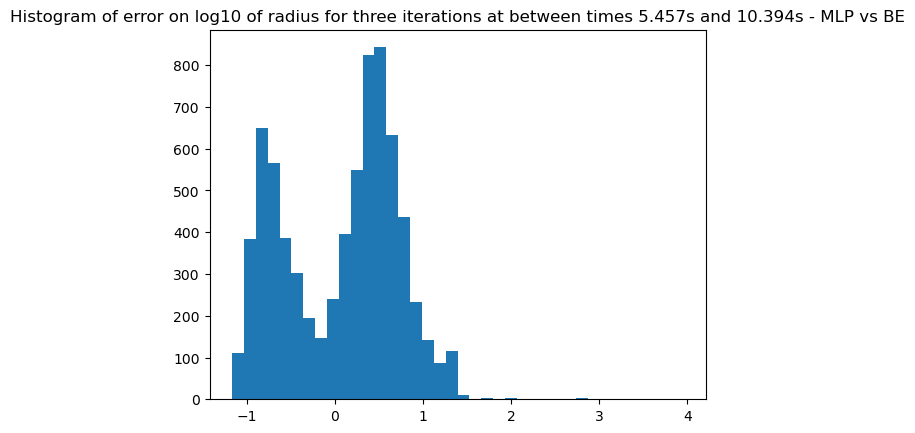

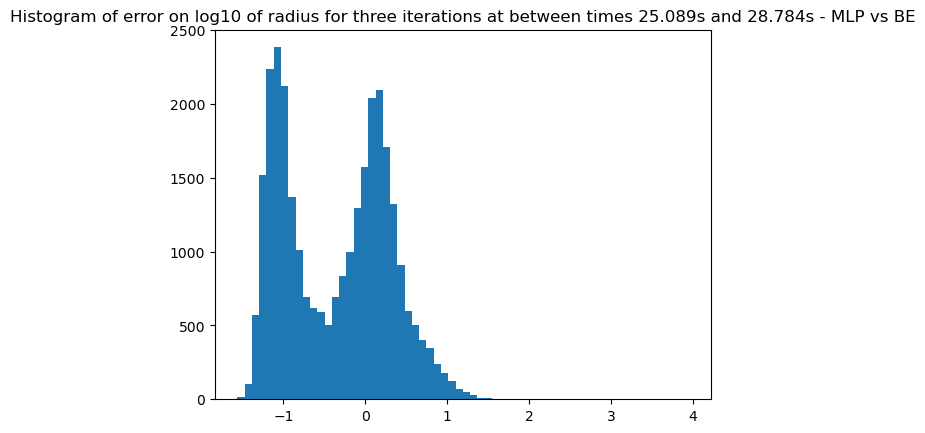

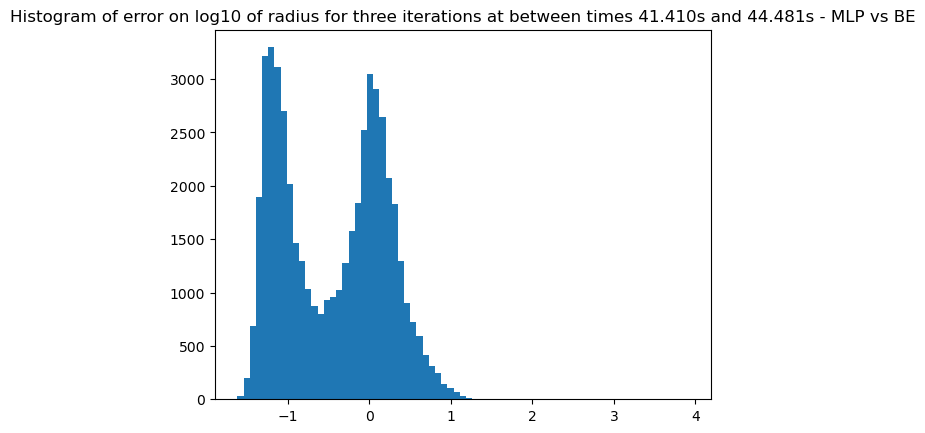

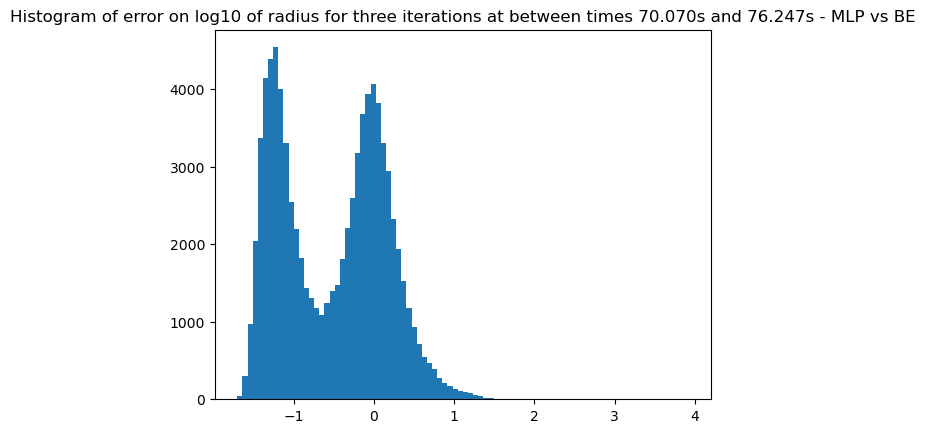

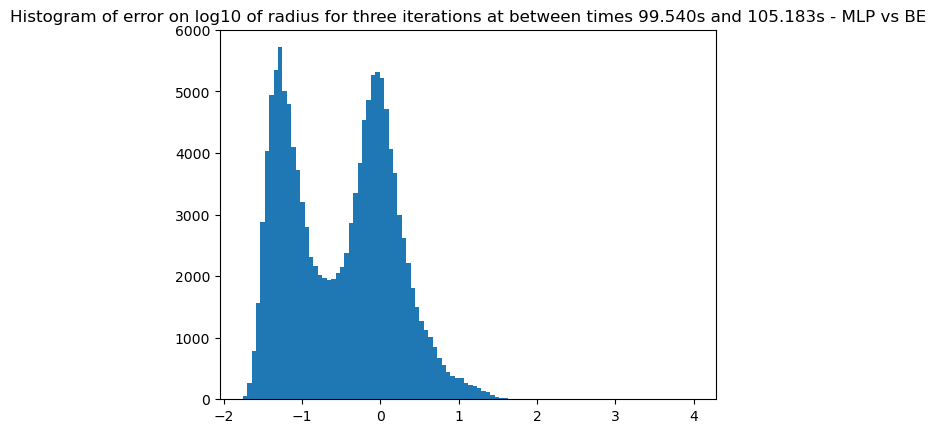

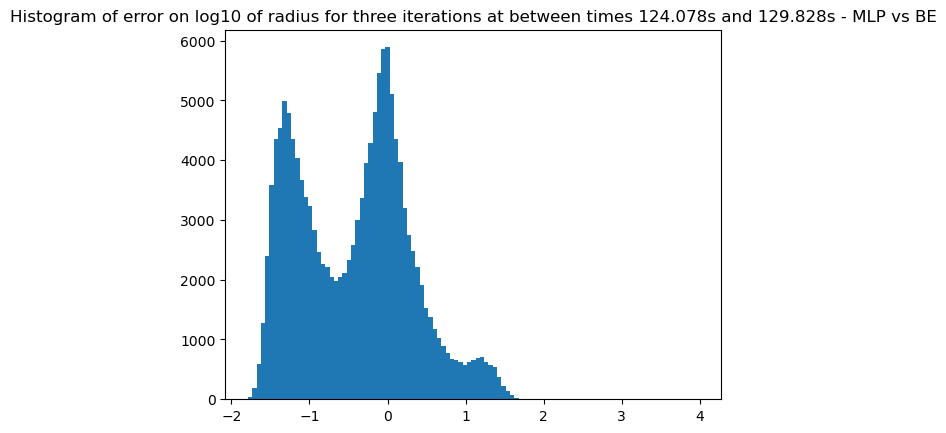

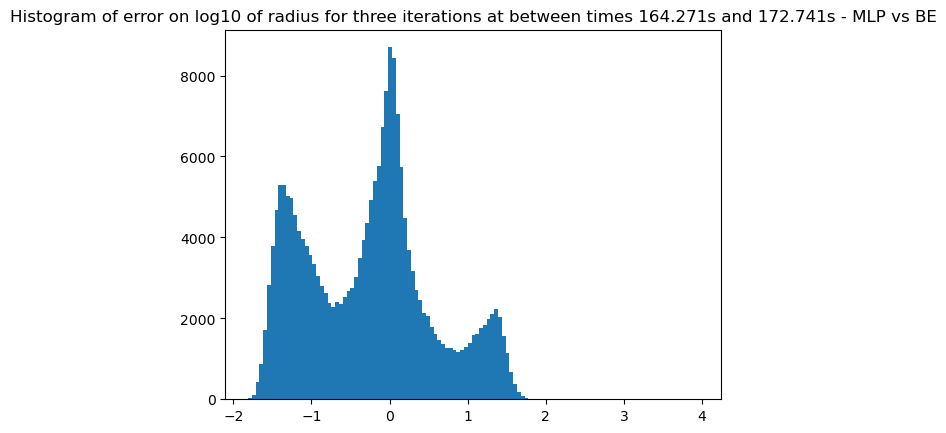

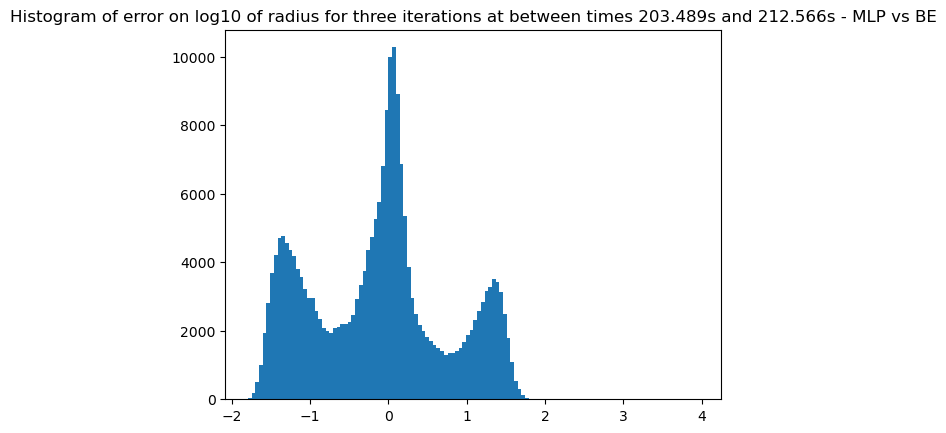

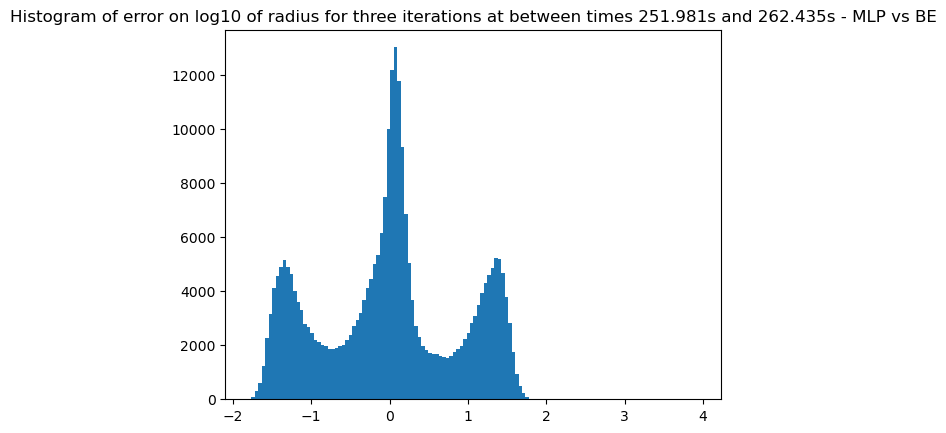

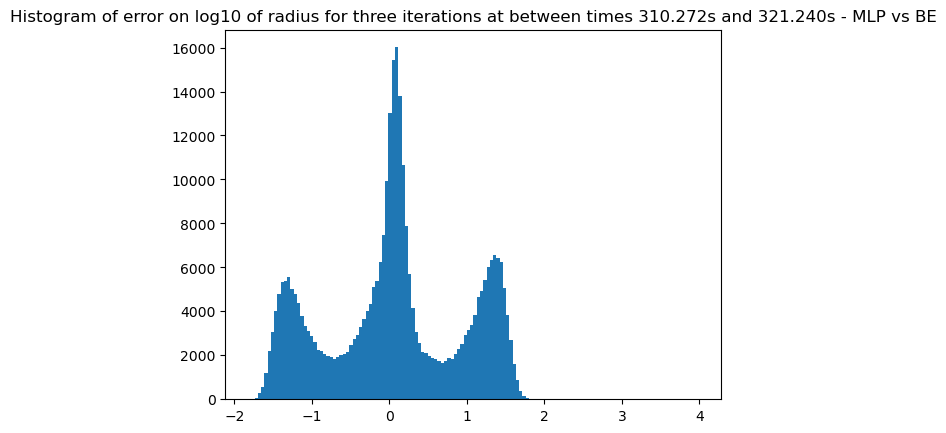

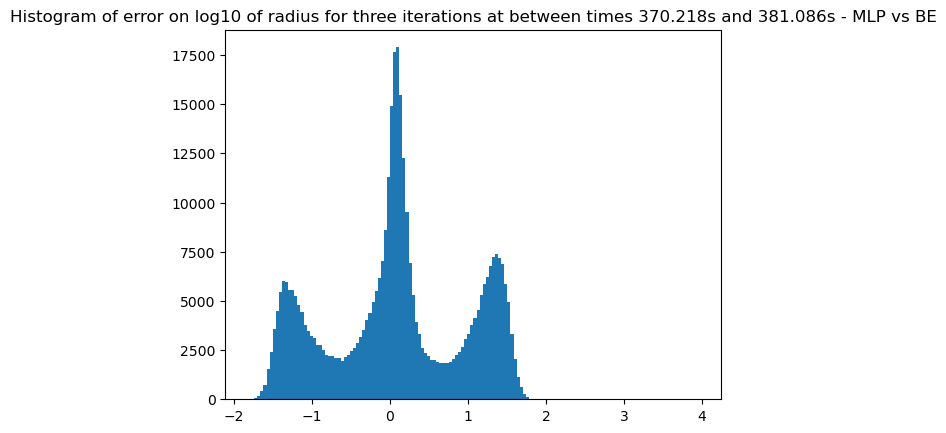

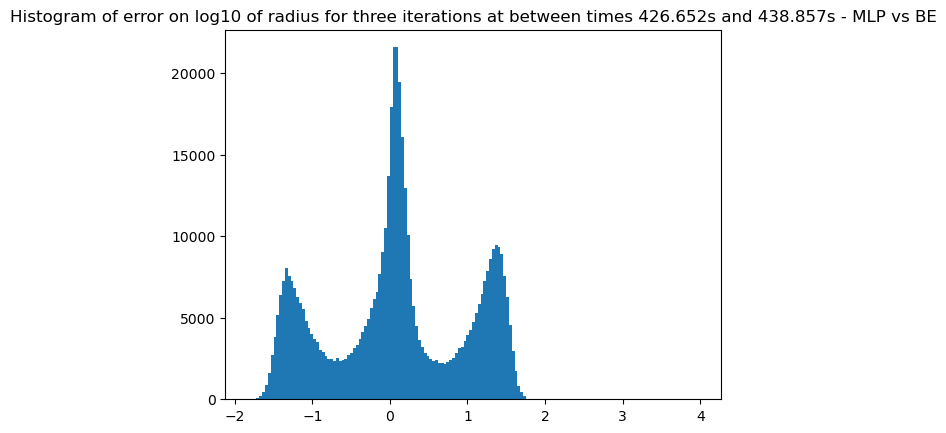

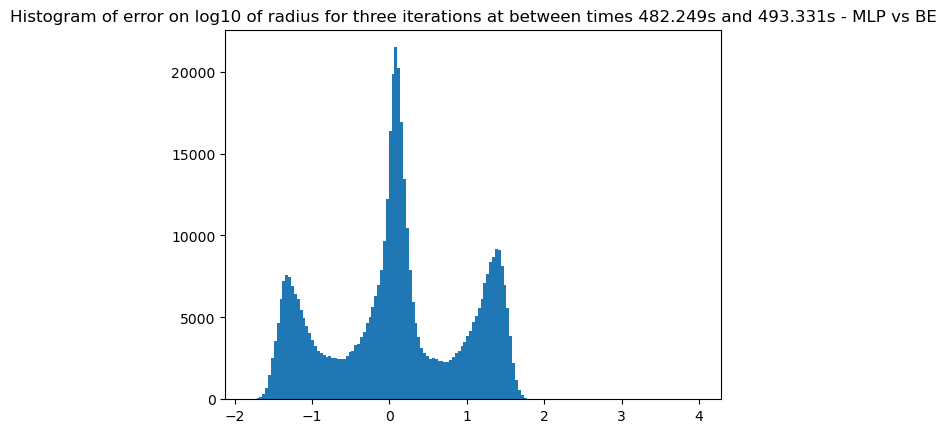

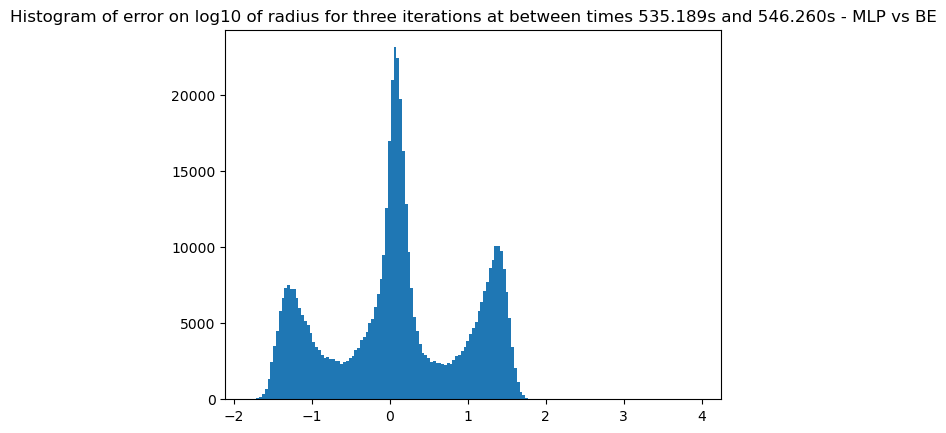

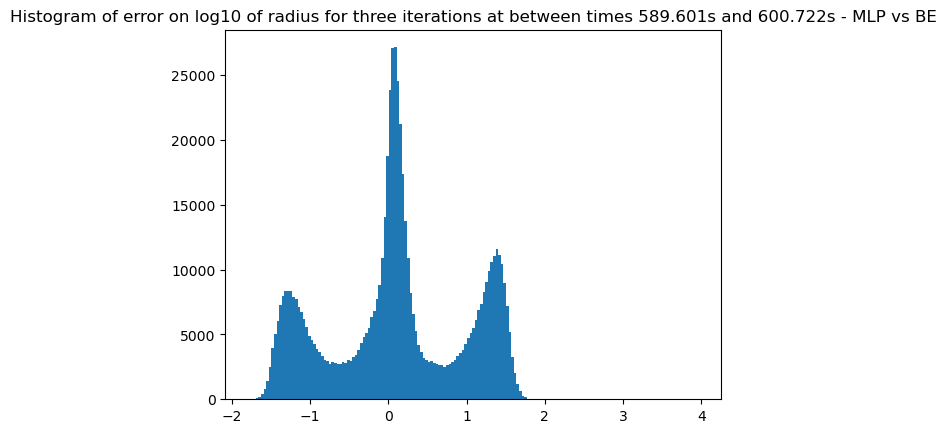

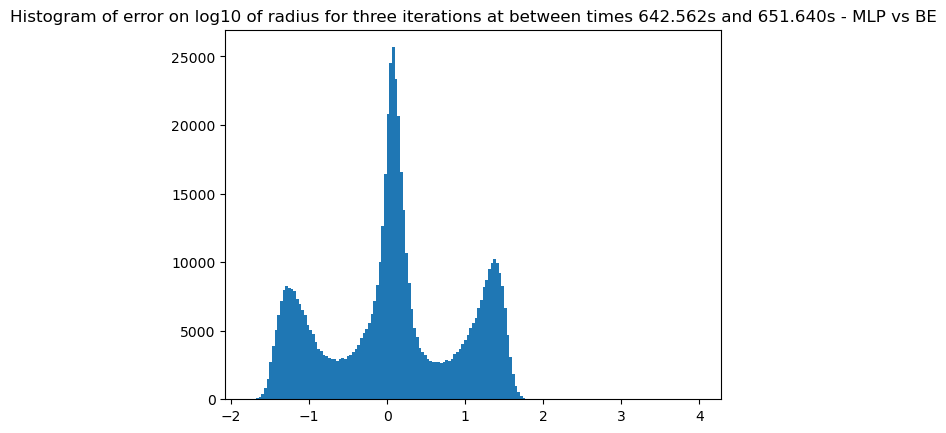

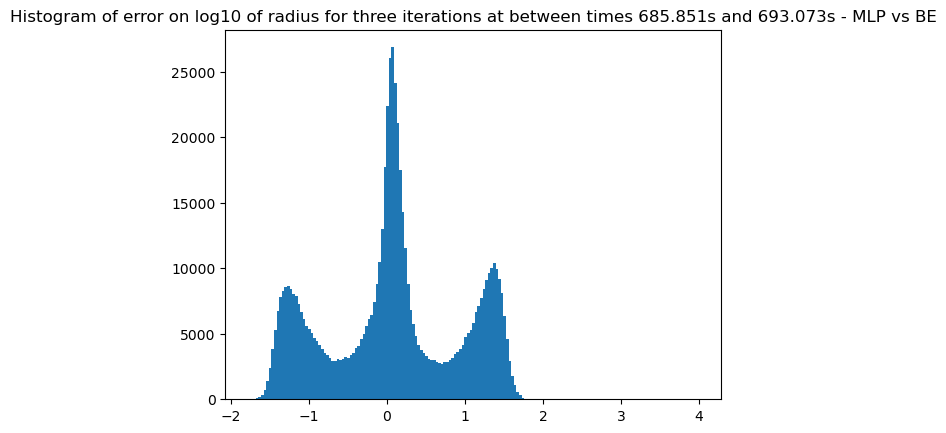

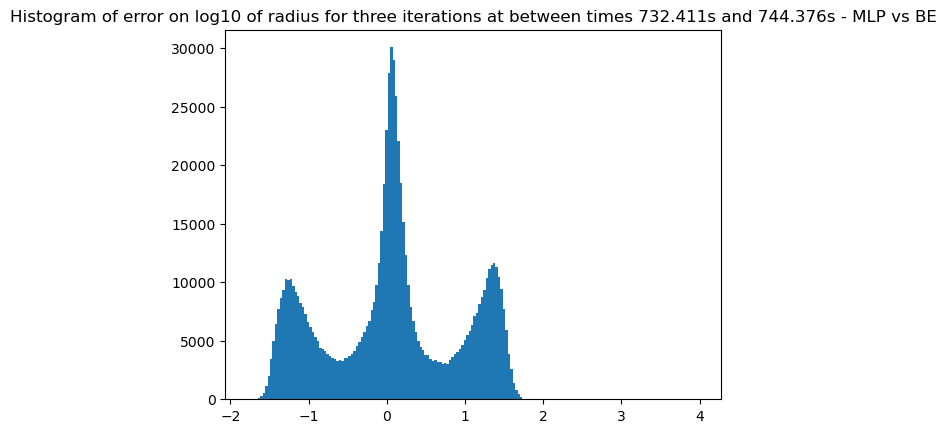

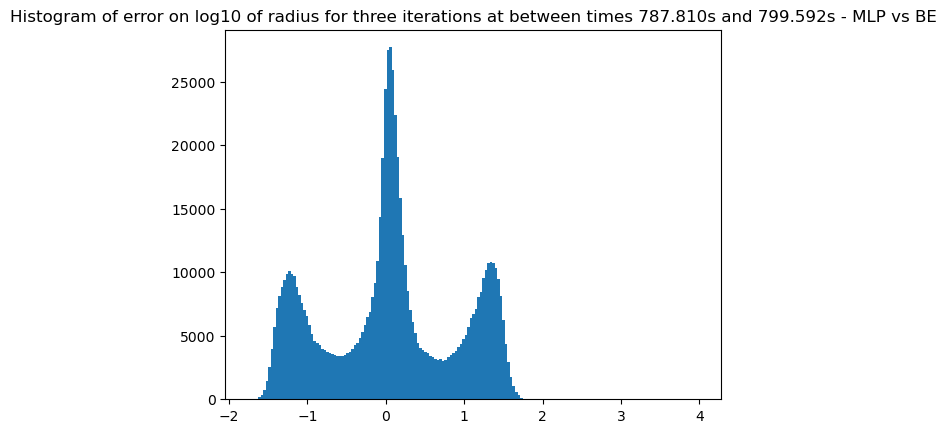

In [13]:
times = df[df["particle id"] == 5000]["time"].to_numpy()
for i in range(0, len(times)//500):
    plt.figure()
    t_start = times[i*500 + 5]
    t_end = times[i*500 + 105]
    particles = df[(df["time"] > t_start) & (df["time"] < t_end) & (df["error log10 i3 output radius"].notna())]
    plt.hist(particles["error log10 i3 output radius"], bins=np.floor(2*np.cbrt(len(particles))).astype(int))
    plt.title(f"Histogram of error on log10 of radius for three iterations at between times {t_start:.3f}s and {t_end:.3f}s - MLP vs BE")
    plt.show()

In [14]:
oijsadfoijsadfoijsadf

















NameError: name 'oijsadfoijsadfoijsadf' is not defined